# DS3000 Practicum 3
Group Members: Pujan Desai, Nandhini Natarajan, Matthew Hu, Rei Masuya

In [29]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import chi2_contingency, f_oneway, pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [8]:
#import dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

#ensure dataset is imported properly
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Question 1 — The DS Problem (0 pts)

In your own words, formulate the Data Science problem

Diabetics has become a growing problem in the United States. Diabetes is a chronic condition affecting millions of Americans, is influenced by numerous factors. However, many individuals are unaware of their condition or are at risk of developing diabetes. In this practicum, we are exploring the CDC Diabetes Health Indicators dataset to understand the relationship between lifestyle factors and diabetic outcomes among patients in the United States. This project aims to identify key factors associated with diabetes based on the features provided.

## Question 2 — Prepare the Data (5 pts)

<ul>
<li>Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.</li>
    
<li>Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.</li>
</ul>

In [9]:
#view data types
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [10]:
#convert to suitable types

#categorical features
df = df.astype({
    'Diabetes_012' : 'category',
    'GenHlth' : 'category',
    'Age' : 'category',
    'Education' : 'category',
    'Income' : 'category'
})

#binary/integer features
df = df.astype({
    'HighBP' : 'int',
    'HighChol' : 'int',
    'CholCheck' : 'int',
    'BMI' : 'int',
    'Smoker' : 'int',
    'Stroke' : 'int',
    'HeartDiseaseorAttack' : 'int',
    'PhysActivity' : 'int',
    'Fruits' : 'int',
    'Veggies' : 'int',
    'HvyAlcoholConsump' : 'int',
    'AnyHealthcare' : 'int',
    'NoDocbcCost' : 'int',
    'MentHlth' : 'int',
    'PhysHlth' : 'int',
    'DiffWalk' : 'int',
    'Sex' : 'int'
})

#confirm changes
df.dtypes

Diabetes_012            category
HighBP                     int64
HighChol                   int64
CholCheck                  int64
BMI                        int64
Smoker                     int64
Stroke                     int64
HeartDiseaseorAttack       int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                   int64
Sex                        int64
Age                     category
Education               category
Income                  category
dtype: object

#### Explanation:

All the feature's types were converted based on what they represented through consultation of the data dictionary. Since ***Diabetes_012*** is the target variable in this ML modeling practicum and has 3 classes (diabetic, pre-diabetic and no diabetes), it is appropriately set as categorical due to this being a classification problem. Other features such as ***GenHlth, Age, Education,*** and ***Income*** are also categorical since they represent a range of values. All the other variables were converted to integers, as they either represented numerical measures (e.g., ***BMI***) or binary outcomes, making them suitable and compatible for ML modeling.

In [6]:
#check for missing values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Explanation:

There are no missing values in this dataset, so no additional preprocessing is required in this aspect.

In [11]:
#check for number of invalid values

#binary
binary_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                  'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
binary_invalid_count = (df[binary_columns].apply(lambda col: ~col.isin([0, 1])).sum()).sum()

#integer
integer_columns = ['MentHlth', 'PhysHlth']
integer_invalid_count = (df[integer_columns].apply(lambda col: ~(col.between(0, 30))).sum()).sum()
bmi_invalid_count = (df['BMI'] < 0).sum()

#categorical
target_feature_invalid_count = df[~df['Diabetes_012'].isin([0, 1, 2])].shape[0]

#define valid ranges
valid_genhlth = [1, 2, 3, 4, 5]
valid_age = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
valid_education = [1, 2, 3, 4, 5, 6]
valid_income = [1, 2, 3, 4, 5, 6, 7, 8]

invalid_genhlth_count = (~df['GenHlth'].isin(valid_genhlth)).sum()
invalid_age_count = (~df['Age'].isin(valid_age)).sum()
invalid_education_count = (~df['Education'].isin(valid_education)).sum()
invalid_income_count = (~df['Income'].isin(valid_income)).sum()

#results
print(f"Invalid values in the binary features (values not either 0 or 1):, {binary_invalid_count}")
print(f"Invalid values in {', '.join(integer_columns)} (values not between 0 and 30): {integer_invalid_count}")
print(f"Invalid values in BMI (negative values): {bmi_invalid_count}")
print(f"Invalid values in target feature Diabetes_012 (values not either 0, 1, or 2): {target_feature_invalid_count}")
print(f"Invalid values in GenHlth (values not between 1 and 5): {invalid_genhlth_count}")
print(f"Invalid values in Age (values not between 1 and 13): {invalid_age_count}")
print(f"Invalid values in Education (values not between 1 and 6): {invalid_education_count}")
print(f"Invalid values in Income (values not between 1 and 8): {invalid_income_count}")

Invalid values in the binary features (values not either 0 or 1):, 0
Invalid values in MentHlth, PhysHlth (values not between 0 and 30): 0
Invalid values in BMI (negative values): 0
Invalid values in target feature Diabetes_012 (values not either 0, 1, or 2): 0
Invalid values in GenHlth (values not between 1 and 5): 0
Invalid values in Age (values not between 1 and 13): 0
Invalid values in Education (values not between 1 and 6): 0
Invalid values in Income (values not between 1 and 8): 0


#### Explanation:

Invalid values in the dataset were handled by checking each feature against its valid range or category. For **Diabetes_012**, any values not either 0, 1, or 2 were checked for since it’s the target variable and needs to be clean for classification. Features like **GenHlth, Age, Education**, and **Income** were checked to make sure their values fit the valid categories defined in the data dictionary. For numeric features like **MentHlth, PhysHlth**, and **BMI**, out-of-range or negative values were counted. No invalid values were present, therefore, no additional preprocessing was required in this aspect.

In [8]:
#summary statistics to identify features with potential outliers
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,3.184772,4.242081,0.168224,0.440342
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,7.412847,8.717951,0.374066,0.496429
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000


In [12]:
#handle BMI outliers
mean_bmi = df['BMI'].mean()
std_bmi = df['BMI'].std()

lower_bound = mean_bmi - (3 * std_bmi)
upper_bound = mean_bmi + (3 * std_bmi)

df['BMI'] = df['BMI'].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

#find skew after removing outliers
print('BMI skew:', df['BMI'].skew())

BMI skew: 0.8030346517356065


In [13]:
#replace NaN with new median (since slightly skewed) after removing outliers
new_median_bmi = df['BMI'].median()
df['BMI'] = df['BMI'].fillna(new_median_bmi)

#check changes
df['BMI'].describe()

count    253680.000000
mean         28.010679
std           5.576425
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          48.000000
Name: BMI, dtype: float64

#### Explanation:
 
To handle outliers in the **BMI** column, the first step involved identifying values that are more than 3 standard deviations away from the mean. This was done by calculating the mean and standard deviation of the **BMI** column, and then determining the upper and lower bounds for what constitutes a normal range. Any **BMI** values that fell outside of this range (i.e., more than 3 standard deviations away from the mean) were considered outliers and replaced with `NaN` values. This method helps to ensure that extreme outliers do not skew the analysis or model performance. After replacing the outliers with `NaN`, the missing values were filled with the mean of the **BMI** column, ensuring that the dataset remained complete and the overall distribution of the data wasn't skewed due to the influence of outliers. Outliers in **MentHlth** and **PhysHlth** likely represent real individuals experiencing prolonged poor mental or physical health, which are critical to understanding the full range of diabetes-related risk factors. Therefore, they were kept in the dataset. **BMI**, however, had unreal outliers with 98 being the maximum. After doing some online research a BMI of 50 is extremely rare with 40 pushing morbidly obese and that's why **BMI** outliers were handled.

## Question 3 — (20 pts)

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

In [11]:
#summary statistics for numerical features
print(df[['BMI', 'PhysHlth', 'MentHlth']].describe())

                 BMI       PhysHlth       MentHlth
count  253680.000000  253680.000000  253680.000000
mean       28.010679       4.242081       3.184772
std         5.576425       8.717951       7.412847
min        12.000000       0.000000       0.000000
25%        24.000000       0.000000       0.000000
50%        27.000000       0.000000       0.000000
75%        31.000000       3.000000       2.000000
max        48.000000      30.000000      30.000000


#### Explanation:

The dataset shows that the average **BMI** is 28.03, with a standard deviation of 5.58, meaning there's a moderate spread in the BMI values. When it comes to **PhysHlth** (physical health), the average score is 4.24, which means most people reported having some poor physical health days, but there's a wide range of responses, from 0 to 30 days. Many people reported no poor physical health days at all. For **MentHlth** (mental health), the average score is 3.18, indicating that a good number of people had few or no days with poor mental health, with most responses leaning toward the lower end of the scale. Overall, it looks like most people feel pretty good in terms of both physical and mental health, but there are still some who experience challenges as indicated by the high standard deviation.

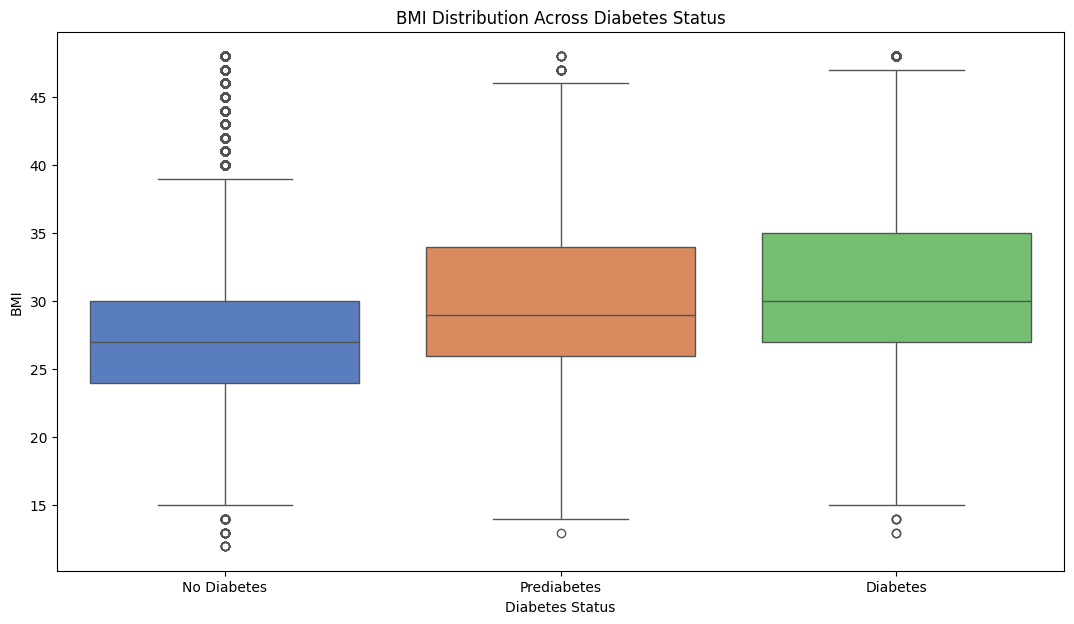

In [49]:
#plot distribution of BMI across diabetic classes
plt.figure(figsize=(13, 7))
sns.boxplot(x='Diabetes_012', y='BMI', data=df, hue='Diabetes_012', palette='muted', legend=False)
plt.title('BMI Distribution Across Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.xticks([0, 1, 2], ['No Diabetes', 'Prediabetes', 'Diabetes'])
 
plt.show()
 
#convert dtypes back
df['Diabetes_012'] = df['Diabetes_012'].astype('category')
df['BMI'] = df['BMI'].astype('int')

#### Explanation:

The boxplot shows that people with prediabetes or diabetes tend to have higher BMIs, with a higher median and a broader range in the middle 50% compared to those without diabetes. There are also more extreme high BMI values in the diabetes group, suggesting that very high BMIs are more common amongst those with diabetes. Overall, the higher BMIs in this group highlights the connection between obesity and diabetes risk.

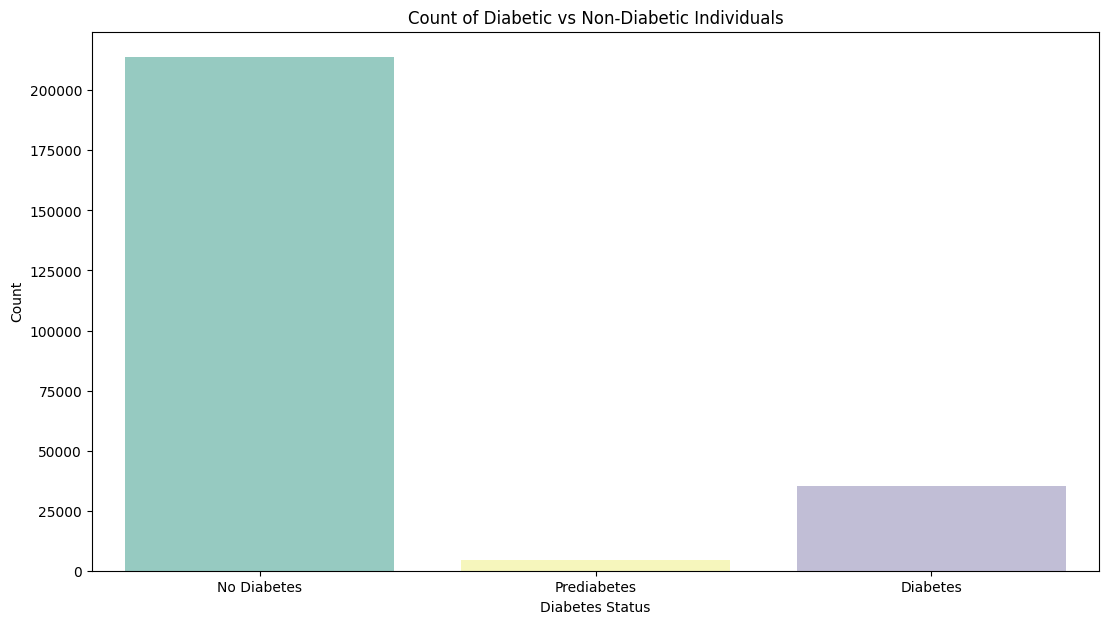

In [13]:
#plot of number of diabetic vs non-diabetic individuals in the dataset
plt.figure(figsize=(13, 7))
sns.countplot(x='Diabetes_012', data=df, hue='Diabetes_012', palette='Set3', legend=False)
plt.title('Count of Diabetic vs Non-Diabetic Individuals')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

#### Explanation:

This bar chart compares the number of individuals across three diabetes statuses: No Diabetes, Prediabetes, and Diabetes. The majority of individuals fall into the No Diabetes category, with the count being significantly higher than the other two groups. Prediabetes has the smallest count, indicating it’s less common. The Diabetes group has a moderate count, showing it's more prevalent than Prediabetes but much less common than No Diabetes. This bar chart highlights the disparity in the distribution of diabetes statuses in the dataset.

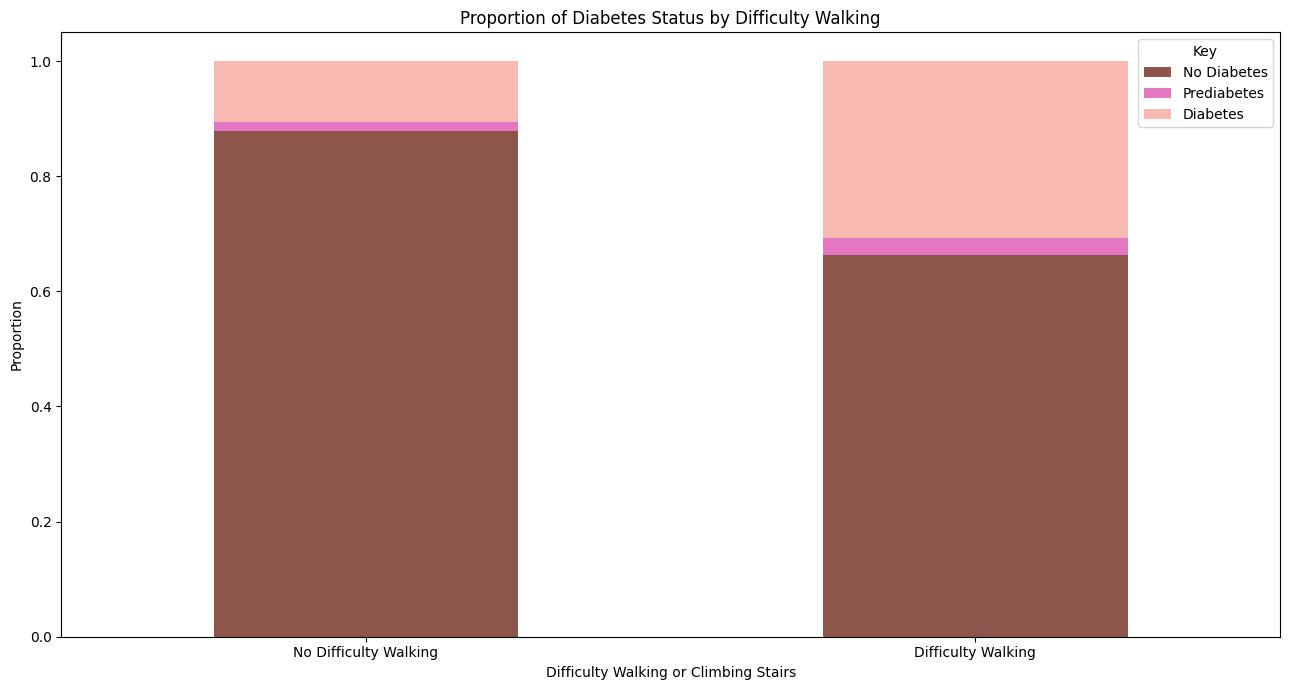

In [14]:
#group variables
diffwalk_vs_diabetes = df.groupby('DiffWalk')['Diabetes_012'].value_counts(normalize=True).unstack()

#bar plot of difficulty walking up stairs vs diabetes status
ax = diffwalk_vs_diabetes.plot(kind='bar', stacked=True, figsize=(13, 7), color=['#8c564b', '#e377c2', '#f7b9b1'])
ax.set_title('Proportion of Diabetes Status by Difficulty Walking')
ax.set_xticklabels(['No Difficulty Walking', 'Difficulty Walking'], rotation=0)
ax.set_xlabel('Difficulty Walking or Climbing Stairs')
ax.set_ylabel('Proportion')

#legend for clarity
ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Key')

plt.tight_layout()
plt.show()

#### Explanation:

This graph shows the proportion of diabetes status among individuals with and without difficulty walking or climbing stairs. The majority in both groups are classified as not having diabetes but the proportion of people with diabetes or prediabetes is noticeably higher for those who report difficulty walking. This suggests a potential link between walking issues and increased prevalence of diabetes or prediabetes. This makes sense as overtime, diabetes can cause nerve damage in the feet, making it harder/more painful to walk.

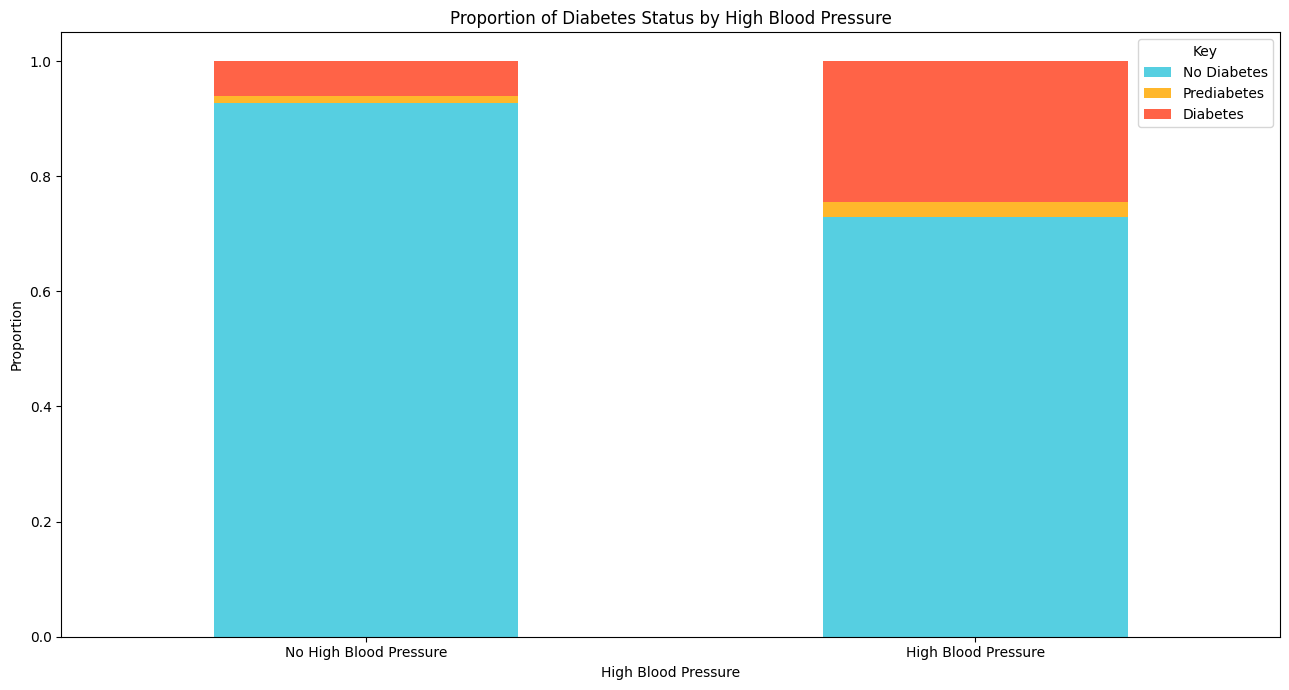

In [15]:
#group variables
highbp_vs_diabetes = df.groupby('HighBP')['Diabetes_012'].value_counts(normalize=True).unstack()

#bar plot of high blood pressure vs diabetes status
ax = highbp_vs_diabetes.plot(kind='bar', stacked=True, figsize=(13, 7), color=['#56cfe1', '#ffb72b', '#ff6347'])
ax.set_title('Proportion of Diabetes Status by High Blood Pressure')
ax.set_xticklabels(['No High Blood Pressure', 'High Blood Pressure'], rotation=0)
ax.set_xlabel('High Blood Pressure')
ax.set_ylabel('Proportion')

#legend for clarity
ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Key')

plt.tight_layout()
plt.show()

#### Explanation:

This graph shows the proportion of diabetes status among individuals with and without high blood pressure. In the group without high blood pressure, the majority do not have diabetes, with smaller proportions of prediabetes and diabetes. In contrast, the group with high blood pressure has a noticeably larger share of individuals with prediabetes and diabetes. This indicates that high blood pressure is associated with a higher prevalence of diabetes and prediabetes compared to those without high blood pressure.

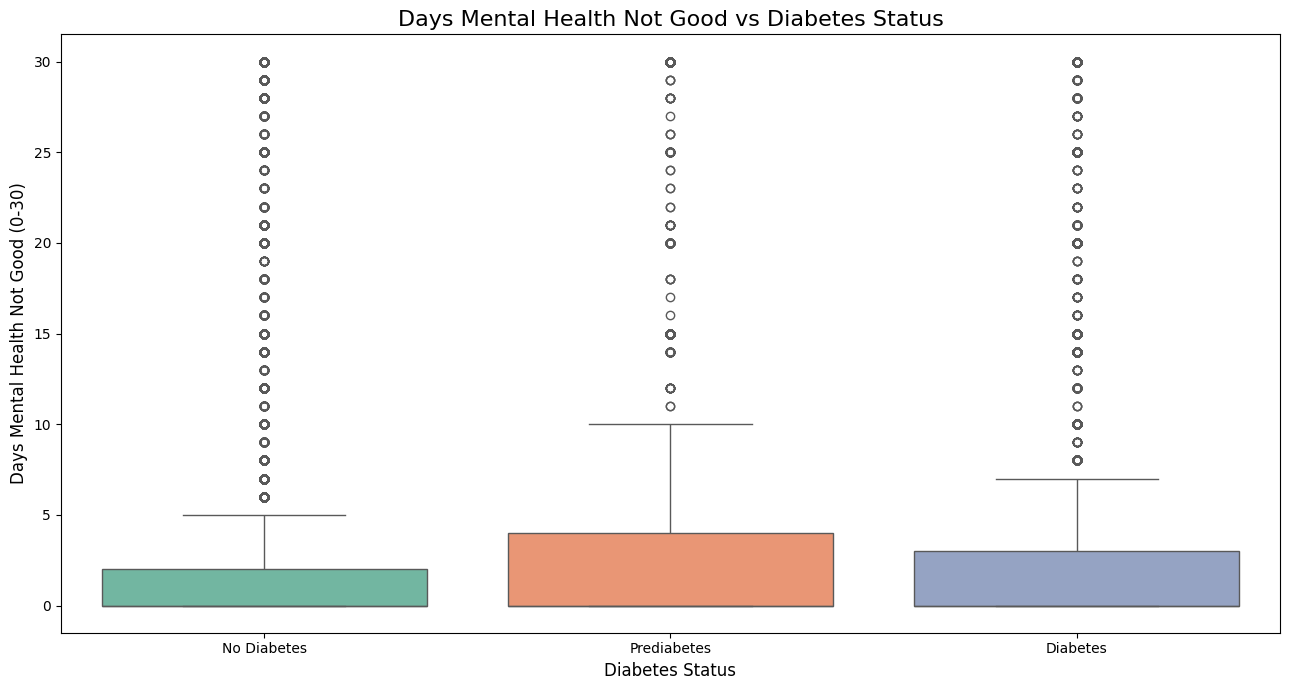

In [16]:
#box plot of days mental health was not good vs diabetes status
plt.figure(figsize=(13, 7))
sns.boxplot(data=df, x='Diabetes_012', y='MentHlth', hue='Diabetes_012', palette='Set2', legend=False)

#labels and title
plt.title('Days Mental Health Not Good vs Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Days Mental Health Not Good (0-30)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Prediabetes', 'Diabetes'], fontsize=10)

plt.tight_layout()
plt.show()

#### Explanation:

This box plot displays the distribution of days when mental health was reported as not good across different diabetes statuses. Individuals with no diabetes report fewer days of poor mental health on average, with a smaller interquartile range and fewer outliers. In contrast, individuals with prediabetes and diabetes show higher median values and wider distributions, indicating a greater number of days with poor mental health. Notably, individuals with diabetes have the highest number of outliers, suggesting some report an extensive number of days with mental health challenges. This suggests a possible relationship between diabetes status and mental health, where individuals with prediabetes or diabetes may experience poorer mental health more frequently. This could be due to the stress and physical burden associated with diabetes.

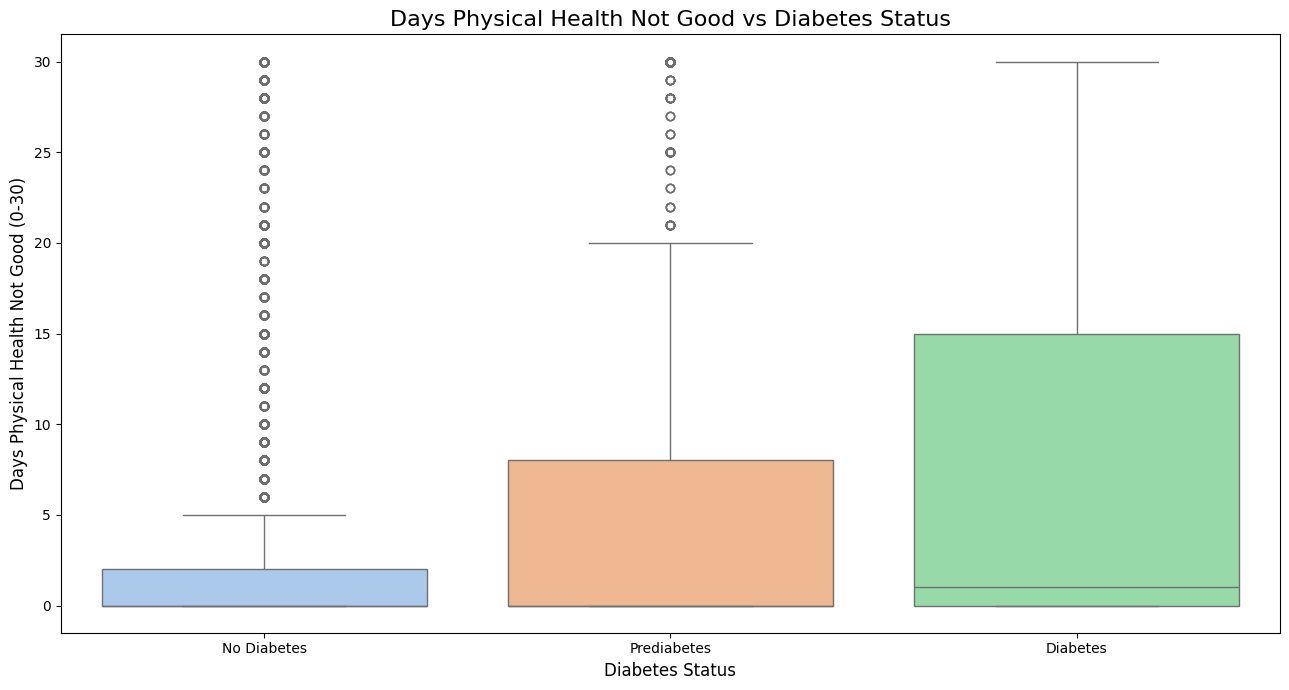

In [17]:
#box plot of days physical health was not good vs diabetes status
plt.figure(figsize=(13, 7))
sns.boxplot(data=df, x='Diabetes_012', y='PhysHlth', hue='Diabetes_012', palette='pastel', legend=False)

#labels and title
plt.title('Days Physical Health Not Good vs Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Days Physical Health Not Good (0-30)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Prediabetes', 'Diabetes'], fontsize=10)

plt.tight_layout()
plt.show()

#### Explanation:

This box plot displays the distribution of days when physical health was reported as not good across different diabetes statuses. Individuals with no diabetes report the fewest days of poor physical health on average, with a smaller interquartile range and fewer outliers, indicating better overall physical health. In contrast, individuals with prediabetes and diabetes report higher median values and wider distributions, suggesting more frequent physical health challenges. Those with diabetes show the largest variation, with numerous outliers indicating some individuals experience extended periods of poor physical health. Overall, the data suggests a clear relationship between diabetes status and physical health, with individuals with prediabetes or diabetes experiencing significantly more days of poor physical health, likely due to the physical demands and complications associated with diabetes.

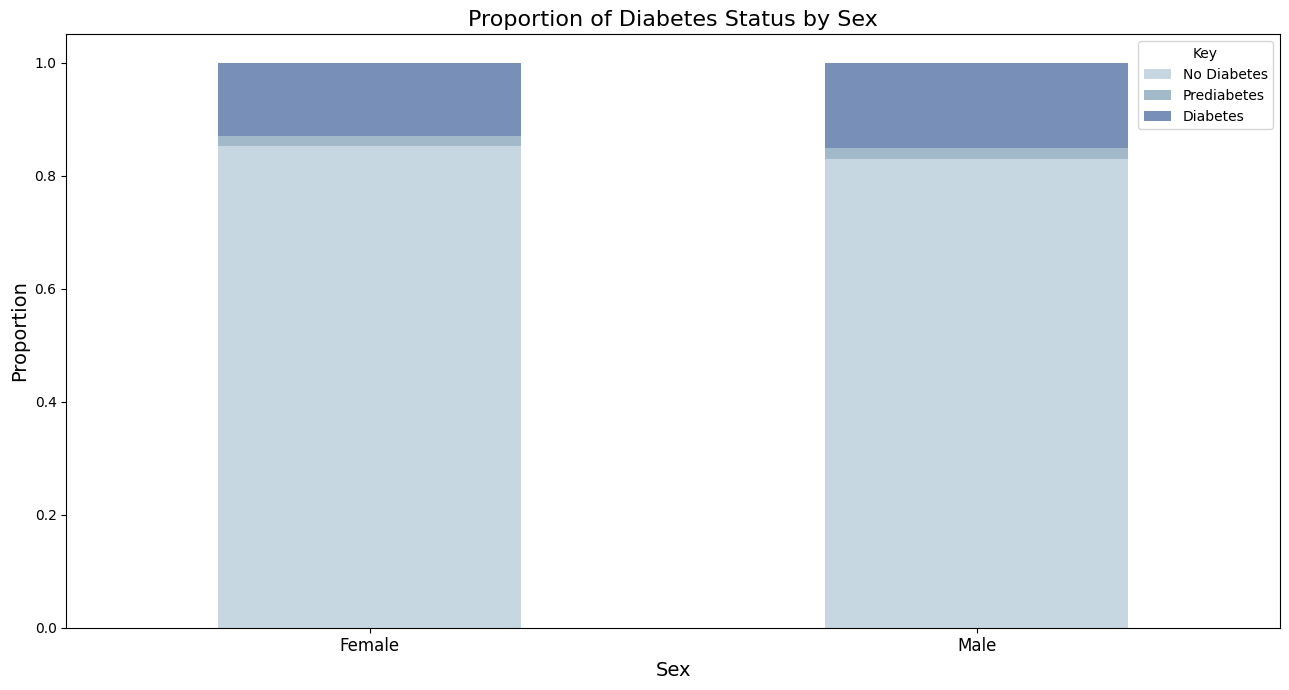

In [18]:
#group by sex and diabetes status
sex_vs_diabetes = df.groupby('Sex')['Diabetes_012'].value_counts(normalize=True).unstack()

#bar plot of sex vs diabetes status
ax = sex_vs_diabetes.plot(kind='bar', stacked=True, figsize=(13, 7), color=['#c6d7e1', '#a2b9c9', '#7890b7'])
ax.set_title('Proportion of Diabetes Status by Sex', fontsize=16)
ax.set_xticklabels(['Female', 'Male'], rotation=0, fontsize=12)
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)

#legend for clarity
ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Key', fontsize=10)

plt.tight_layout()
plt.show()

#### Explanation:

This stacked bar plot displays the proportion of diabetes statuses by sex. For both females and males, the majority of individuals do not have diabetes, making up the largest proportion of the population. Those who have prediabetes and diabetes represent much smaller proportions, with diabetes being the least prevalent in both sexes. The distribution appears similar between males and females, with only subtle differences, suggesting no substantial variation in diabetes status proportions based on sex. This indicates that while diabetes and prediabetes affect both sexes, the prevalence rates do not vary significantly by gender in this dataset.

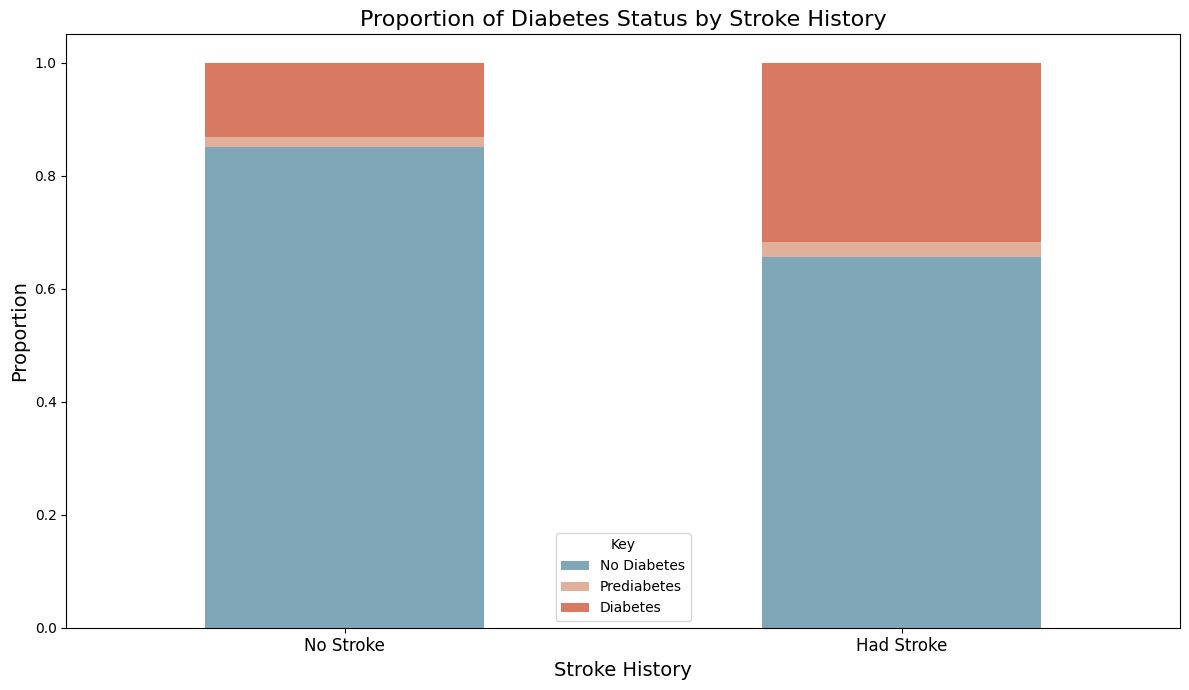

In [19]:
#group by stroke and diabetes status
stroke_vs_diabetes = df.groupby('Stroke')['Diabetes_012'].value_counts(normalize=True).unstack()

#bar plot of stroke vs diabetes status
ax = stroke_vs_diabetes.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#7fa7b8', '#e0b09b', '#d77a61'])
ax.set_title('Proportion of Diabetes Status by Stroke History', fontsize=16)
ax.set_xticklabels(['No Stroke', 'Had Stroke'], rotation=0, fontsize=12)
ax.set_xlabel('Stroke History', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)

#legend for clarity
ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Key', fontsize=10)

plt.tight_layout()
plt.show()

#### Explanation:

This graph compares the proportion of diabetes status between individuals with and without a history of stroke. From the chart, it’s clear that people who have had a stroke are more likely to have diabetes or prediabetes compared to those with no stroke history. The proportion of individuals without diabetes is much higher among the people who have not had a stroke. This suggests a possible link between stroke history and higher diabetes prevalence.

/var/folders/_d/6wm3qbn954v_rhcym_gjzwlr0000gn/T/ipykernel_60873/1497463233.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genhlth_vs_diabetes = df.groupby('GenHlth')['Diabetes_012'].value_counts(normalize=True).unstack(fill_value=0)


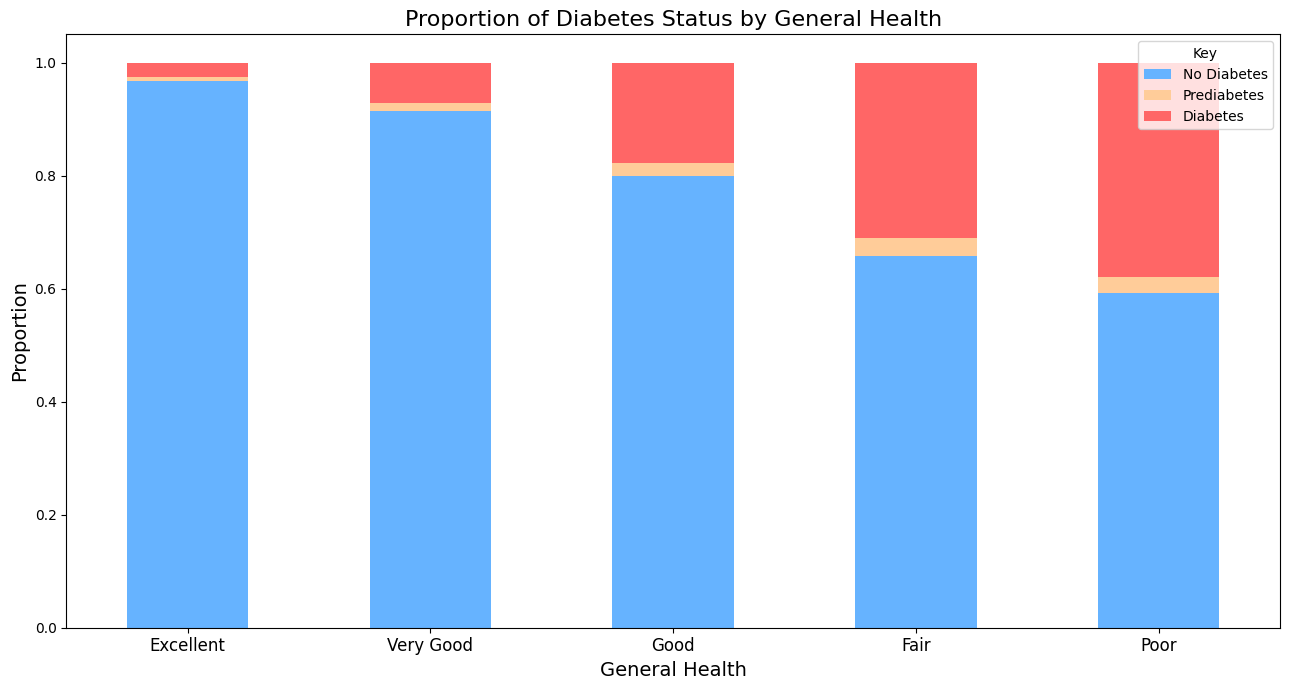

/var/folders/_d/6wm3qbn954v_rhcym_gjzwlr0000gn/T/ipykernel_60873/1497463233.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_diabetes = df.groupby('Age')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0)


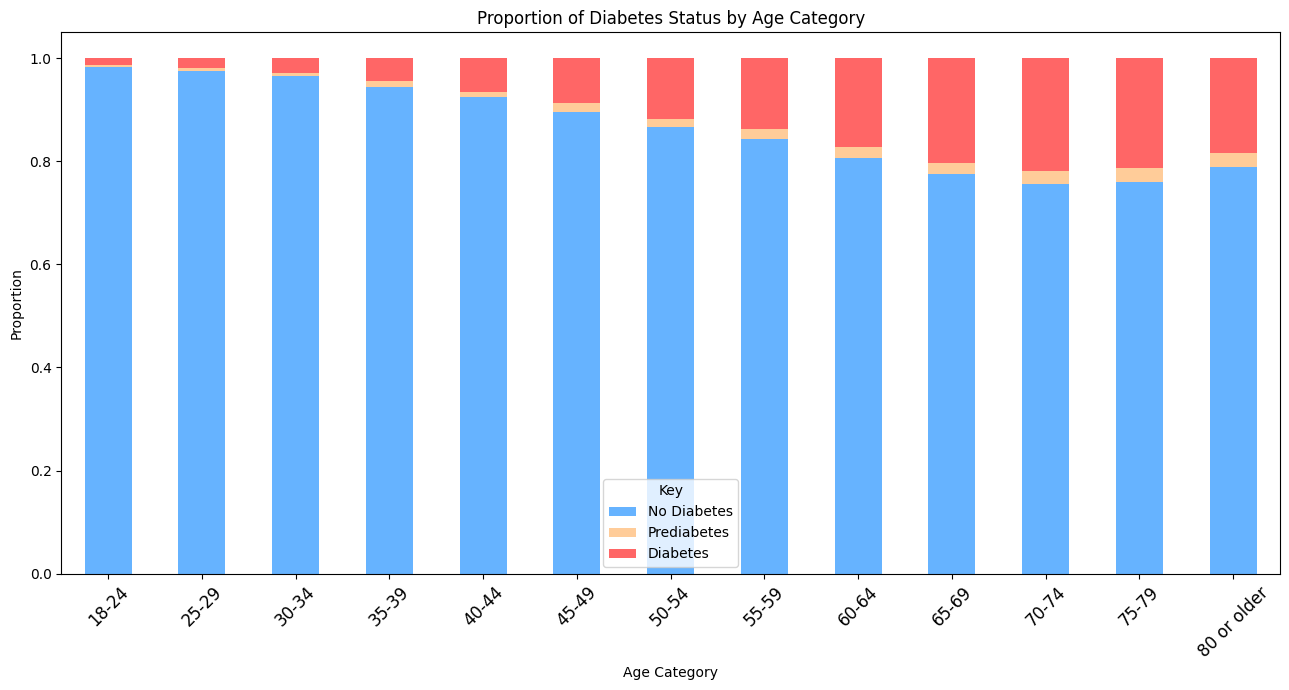

/var/folders/_d/6wm3qbn954v_rhcym_gjzwlr0000gn/T/ipykernel_60873/1497463233.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_vs_diabetes = df.groupby('Education')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0)


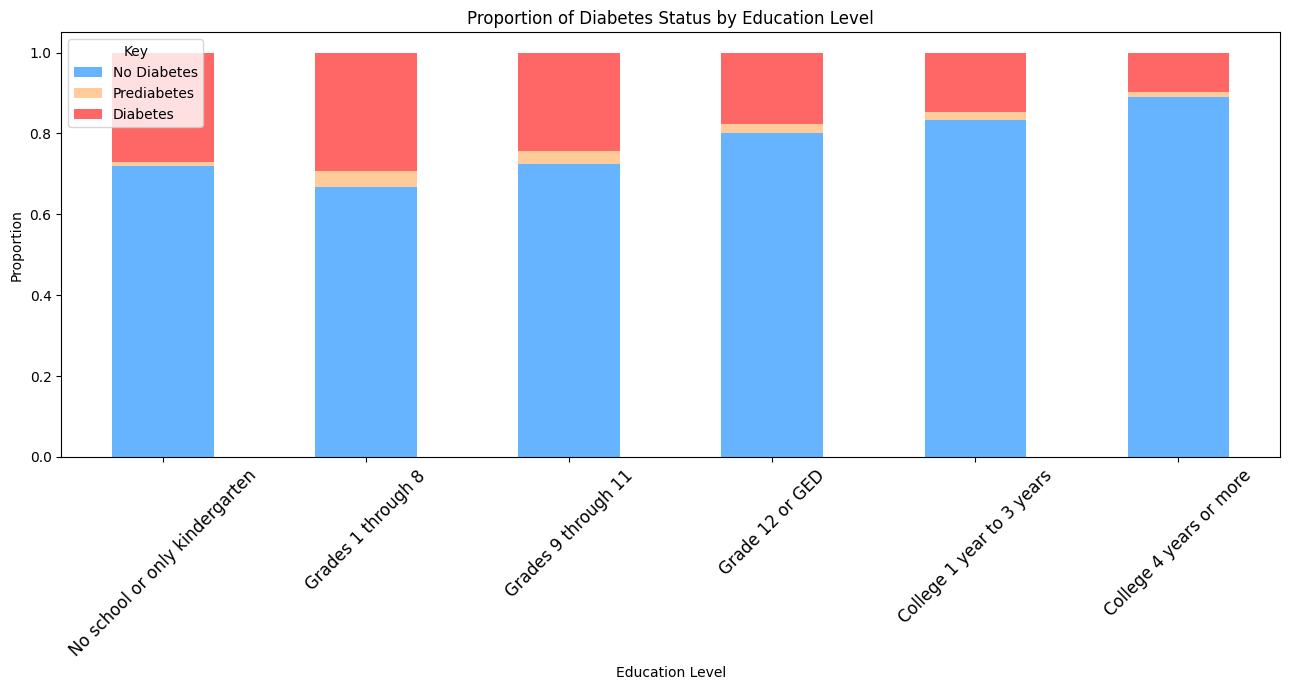

/var/folders/_d/6wm3qbn954v_rhcym_gjzwlr0000gn/T/ipykernel_60873/1497463233.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_vs_diabetes = df.groupby('Income')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0)


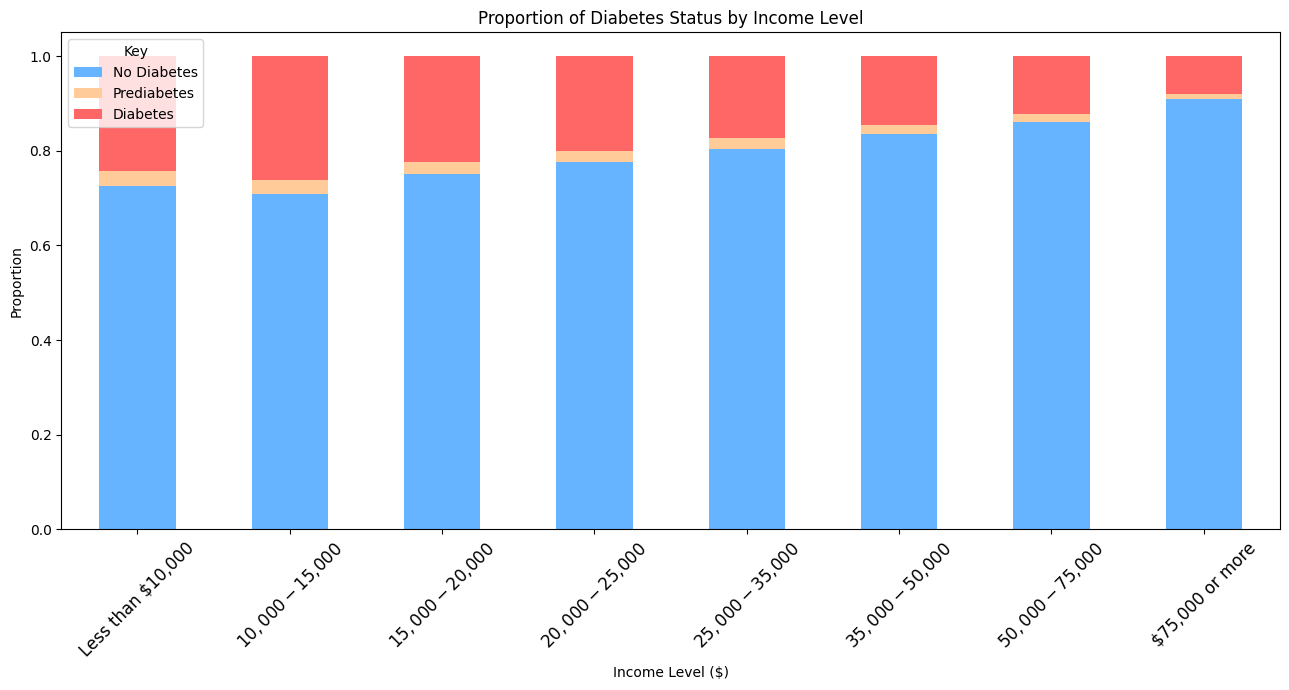

In [20]:
#group variables
genhlth_vs_diabetes = df.groupby('GenHlth')['Diabetes_012'].value_counts(normalize=True).unstack(fill_value=0)

#labels for the general health categories
genhlth_labels = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}

#bar plot of general health vs diabetes status
ax = genhlth_vs_diabetes.plot(kind='bar', stacked=True, figsize=(13, 7), color=['#66b3ff', '#ffcc99', '#ff6666'])
ax.set_title('Proportion of Diabetes Status by General Health', fontsize=16)
ax.set_xticklabels([genhlth_labels[val] for val in genhlth_vs_diabetes.index], rotation=0, fontsize=12)
ax.set_xlabel('General Health', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)

#legend for clarity
ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Key', fontsize=10)

plt.tight_layout()
plt.show()

#plot for age vs diabetes status
age_vs_diabetes = df.groupby('Age')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0)
ax = age_vs_diabetes.plot(kind='bar', stacked=True, figsize=(13, 7), color=['#66b3ff', '#ffcc99', '#ff6666'])
ax.set_title('Proportion of Diabetes Status by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Proportion')
ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Key')

#labels for age
age_labels = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80 or older'
}
ax.set_xticklabels([age_labels[val] for val in age_vs_diabetes.index], rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

#plot for education vs diabetes status
education_vs_diabetes = df.groupby('Education')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0)
ax = education_vs_diabetes.plot(kind='bar', stacked=True, figsize=(13, 7), color=['#66b3ff', '#ffcc99', '#ff6666'])
ax.set_title('Proportion of Diabetes Status by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('Proportion')
ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Key')

#labels for education
education_labels = {
    1: 'No school or only kindergarten',
    2: 'Grades 1 through 8',
    3: 'Grades 9 through 11',
    4: 'Grade 12 or GED',
    5: 'College 1 year to 3 years',
    6: 'College 4 years or more'
}
ax.set_xticklabels([education_labels[val] for val in education_vs_diabetes.index], rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

#plot for income vs diabetes status
income_vs_diabetes = df.groupby('Income')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0)
ax = income_vs_diabetes.plot(kind='bar', stacked=True, figsize=(13, 7), color=['#66b3ff', '#ffcc99', '#ff6666'])
ax.set_title('Proportion of Diabetes Status by Income Level')
ax.set_xlabel('Income Level ($)')
ax.set_ylabel('Proportion')
ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Key')

#labels for income
income_labels = {
    1: 'Less than $10,000',
    2: '$10,000 - $15,000',
    3: '$15,000 - $20,000',
    4: '$20,000 - $25,000',
    5: '$25,000 - $35,000',
    6: '$35,000 - $50,000',
    7: '$50,000 - $75,000',
    8: '$75,000 or more'
}
ax.set_xticklabels([income_labels[val] for val in income_vs_diabetes.index], rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

#### Explanation:

These four graphs highlight the relationship between the categorical features in dataset and diabetes status. The first graph shows that as general health declines, the prevalence of prediabetes and diabetes increases, underscoring the negative impact of diabetes on overall health. Similarly, the second graph reveals a rise in prediabetes and diabetes rates with age, particularly among individuals over 50, suggesting that diabetes becomes more common as people grow older. The third graph indicates that individuals with lower levels of education tend to have worse diabetes outcomes, which aligns with the fourth graph, where those with lower incomes also exhibit higher rates of diabetes. This may reflect challenges in managing a healthy lifestyle due to financial and educational constraints, including reduced access to necessary healthcare resources like insulin and diabetes medications, which are crucial for managing diabetes.

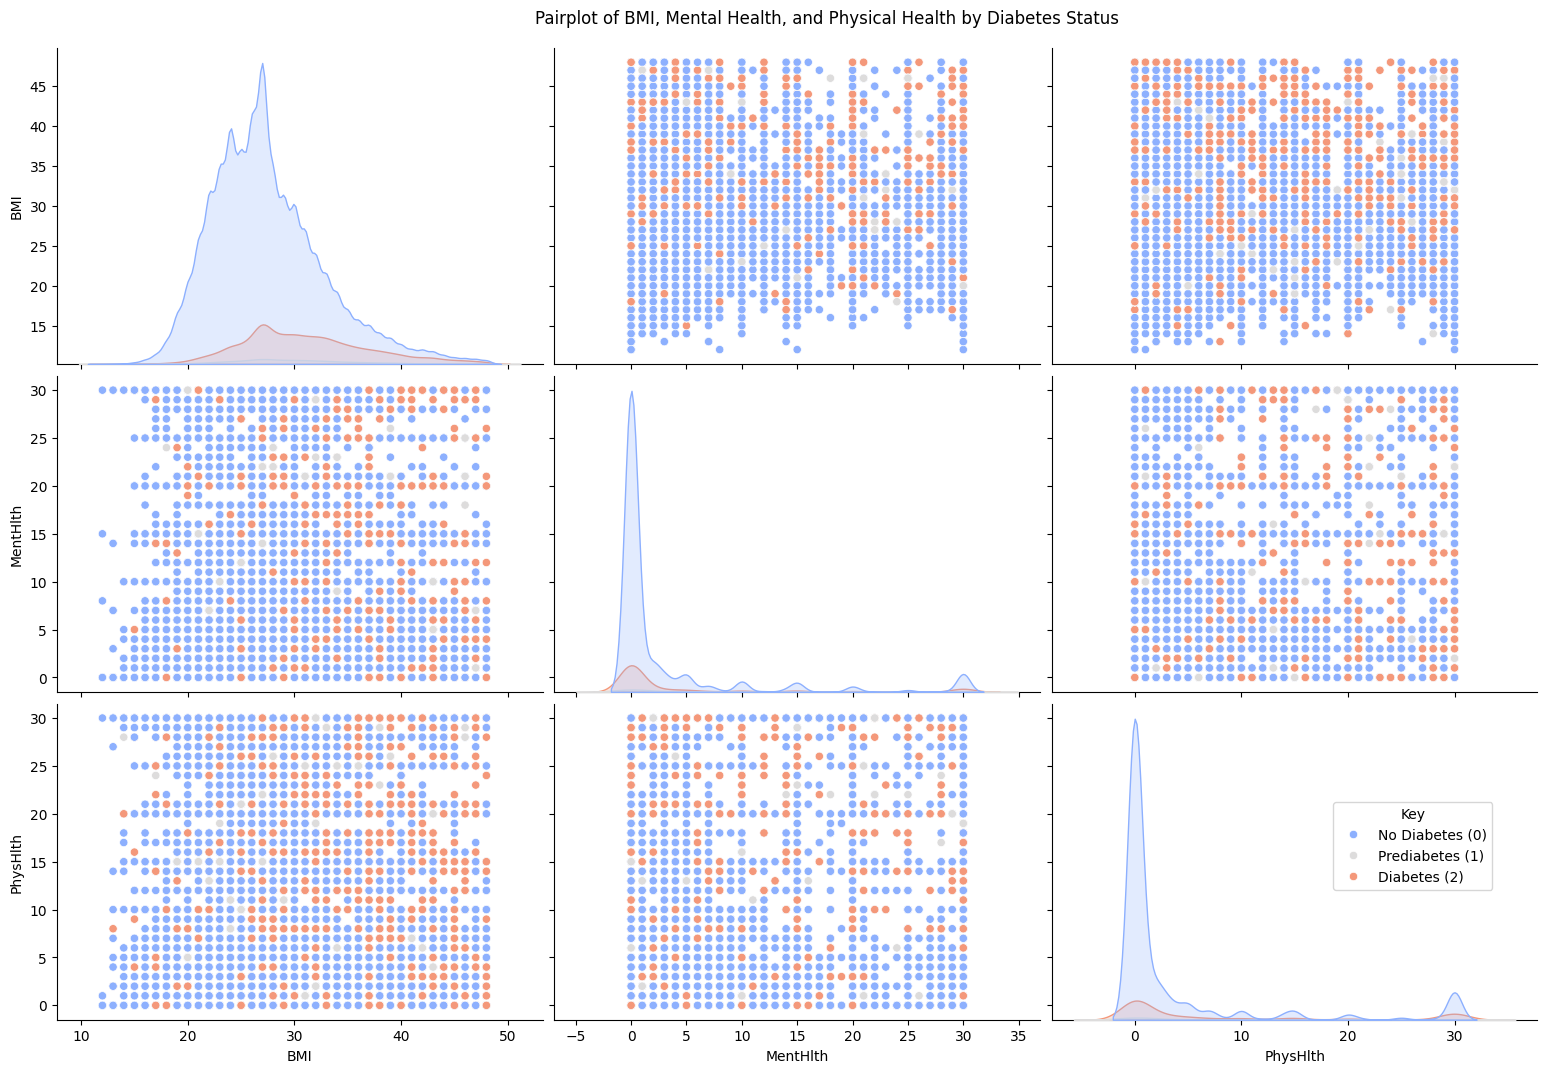

In [21]:
#columns for pairplot
columns = ['BMI', 'MentHlth', 'PhysHlth']

#create pairplot
pairplot = sns.pairplot(df[columns + ['Diabetes_012']], hue='Diabetes_012', palette='coolwarm', height=3.5, aspect=1.5)
plt.suptitle('Pairplot of BMI, Mental Health, and Physical Health by Diabetes Status', y=1.02)
handles, labels = pairplot._legend_data.values(), pairplot._legend_data.keys()
detailed_labels = ['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)']

#legend for clarity
pairplot._legend.remove()
pairplot.fig.legend(handles, detailed_labels, title='Key', loc='lower right', bbox_to_anchor=(0.9, 0.175), ncol=1)

plt.show()

#### Explanation:

This pairplot visualizes the relationships between BMI, mental health, and physical health, stratified by diabetes status. The diagonal plots show the distribution of each variable. Individuals without diabetes dominate the population and exhibit a wide range of BMI values, with peaks around the healthy range. Mental and physical health distributions skew toward fewer days of poor health, especially for individuals without diabetes. In contrast, individuals with prediabetes and diabetes tend to have higher BMIs, reflecting a greater prevalence of obesity. Both groups also show broader distributions and higher peaks for days of poor mental and physical health, indicating increased health challenges. The scatterplots reveal no clear linear relationships between BMI, mental health, and physical health but do show clustering by diabetes status, with higher BMIs and poorer health days more common in the prediabetes and diabetes groups.

## Question 4a — (20 pts)

<ul>
<li>Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.</li>
<li>Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.</li>
</ul>

In [22]:
import scipy.stats as stats
# Pattern 1: BMI (Numerical) vs. Diabetes (Categorical)
group0_bmi = df[df['Diabetes_012'] == 0.0]['BMI']
group1_bmi = df[df['Diabetes_012'] == 1.0]['BMI']
group2_bmi = df[df['Diabetes_012'] == 2.0]['BMI']

anova_result_bmi = f_oneway(group0_bmi, group1_bmi, group2_bmi)

# Results
print(f"ANOVA Test for BMI vs. Diabetes:")
print(f"P-value: {anova_result_bmi.pvalue:.4f}\n")

ANOVA Test for BMI vs. Diabetes:
P-value: 0.0000



In [23]:
# Pattern 2: Income (Categorical) vs. Diabetes (Categorical)
contingency_table_income = pd.crosstab(df['Income'], df['Diabetes_012'])
chi2, p, dof, expected = chi2_contingency(contingency_table_income)

# Results
print(f"Chi-Squared: {chi2}")
print(f"P-Value: {p}")

Chi-Squared: 7816.462905911266
P-Value: 0.0


#### Pattern 3: Age vs. Diabetes
Null Hypothesis: There is no difference in mean age between individuals with and without diabetes.

Alternative Hypothesis: There is a difference in mean age between individuals with and without diabetes.

In [24]:
# Group the different Diabetes
group0_age = df[df['Diabetes_012'] == 0]['Age']
group1_age = df[df['Diabetes_012'] == 1]['Age']
group2_age = df[df['Diabetes_012'] == 2]['Age']

anova_result_age = f_oneway(group0_age, group1_age, group2_age)

# Results
print(f"ANOVA Test for Age vs. Diabetes:")
print(f"F-statistic: {anova_result_age.statistic:.4f}, P-value: {anova_result_age.pvalue:.4f}")

ANOVA Test for Age vs. Diabetes:
F-statistic: 4560.4411, P-value: 0.0000


In [25]:
# Correlation Analysis for Continuous Features
continuous_features = ['BMI', 'PhysHlth', 'Age']
correlation_results = {}

for feature in continuous_features:
    corr, p_value = pearsonr(df[feature], df['Diabetes_012'])
    correlation_results[feature] = {'Correlation': corr, 'P-value': p_value}

# Chi-Square Test for Categorical Features
categorical_features = ['Income', 'HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Smoker']
chi2_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Diabetes_012'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = {'Chi-square': chi2, 'P-value': p_value}

correlation_results, chi2_results

({'BMI': {'Correlation': np.float64(0.2324363856712389),
   'P-value': np.float64(0.0)},
  'PhysHlth': {'Correlation': np.float64(0.1762867357056404),
   'P-value': np.float64(0.0)},
  'Age': {'Correlation': np.float64(0.18502579410172623),
   'P-value': np.float64(0.0)}},
 {'Income': {'Chi-square': np.float64(7816.462905911266),
   'P-value': np.float64(0.0)},
  'HighBP': {'Chi-square': np.float64(18794.644052016425),
   'P-value': np.float64(0.0)},
  'HighChol': {'Chi-square': np.float64(11258.920399414841),
   'P-value': np.float64(0.0)},
  'Stroke': {'Chi-square': np.float64(2916.75197962113),
   'P-value': np.float64(0.0)},
  'HeartDiseaseorAttack': {'Chi-square': np.float64(8244.88910662167),
   'P-value': np.float64(0.0)},
  'PhysActivity': {'Chi-square': np.float64(3789.3014625427313),
   'P-value': np.float64(0.0)},
  'Smoker': {'Chi-square': np.float64(1010.5117511111928),
   'P-value': np.float64(3.716732429411907e-220)}})

## [Optional] Question 4b — (10 pts)
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

<ul>
<li>Perform ONE of the following</li>
    <ul>
    <li>(1) Feature engineering: Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.</li>
    </ul>
</ul>

In [26]:
# Feature Engineering
# creating a new feature MentHlth x PhysHlth
df['MentPhysHlth'] = df['MentHlth'] * df['PhysHlth']

group0_health = df[df['Diabetes_012'] == 0.00]['MentPhysHlth']
group1_health = df[df['Diabetes_012'] == 1.00]['MentPhysHlth']
group2_health = df[df['Diabetes_012'] == 2.00]['MentPhysHlth']

anova = f_oneway(group0_health, group1_health, group2_health)

print(anova.pvalue)


0.0


We created the new feature called MentPhysHlth which essentially just encompasses health as a whole or how healthy is someone. The p value shows it is statistically significant so we can reject the null hypothesis that total health is not a factor. We will not be using this data because mental and physical health already covers the bases that we are trying to factor in. 

## Question 5 — (5 pts)

Partition the data into train/test sets. After which, perform the following:
<ul>
<li>encode any categorical data. Ensure that categorical variables are represented correctly.</li>
<li>normalize numeric data.</li>
    Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture)
</ul>

In [15]:

X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

# Spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

categorical_columns = ['GenHlth', 'Age', 'Education', 'Income']
numeric_columns = ['BMI', 'PhysHlth', 'MentHlth']

#transformers
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

# Fit to training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Confirm transformations
print(f"Shape of transformed training data: {X_train_transformed.shape}")
print(f"Shape of transformed test data: {X_test_transformed.shape}")

Shape of transformed training data: (202944, 45)
Shape of transformed test data: (50736, 45)


The results highlight that preprocessing steps, such as one-hot encoding and standardization, are essential to prepare the data for machine learning. One-hot encoding expanded the feature set to 45 columns by representing categorical variables as binary columns, ensuring compatibility with algorithms. Standardization scaled numeric features for uniformity, preventing bias from large feature magnitudes. These transformations ensure that the training and test sets are consistent, enabling fair evaluation and improved model performance.

## Question 6 — (30 pts)

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
<ul>
<li>Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.</li>
<li>Use GridSearchCV to tune at least two hyperparameters for each algorithm.</li>
<li>Note: do not change the input features in your experiments.</li>
</ul>

In [ ]:
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1_macro', verbose=1)  
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print(f"\nBest parameters for {model_name}: {grid.best_params_}")

    y_pred = best_model.predict(X_test)
    rsme = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')  # Macro average for multiclass
    f1 = f1_score(y_test, y_pred, average='macro')  # Macro F1-score
    print(f"\n{model_name} — Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

    return best_model, {'Accuracy': accuracy, 'Recall': recall, 'F1-Score': f1}


In [32]:
knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}


rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20]
}

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga']
}

In [34]:
best_knn, knn_metrics = train_and_evaluate_model(
    knn_model, knn_params, X_train_transformed, y_train, X_test_transformed, y_test, "KNN Classifier"
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters for KNN Classifier: {'n_neighbors': 3, 'weights': 'distance'}

KNN Classifier — Accuracy: 0.8122, Recall: 0.3954, F1-Score: 0.4022


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
best_logistic, logistic_metrics = train_and_evaluate_model(
    logistic_model, logistic_params, X_train_transformed, y_train, X_test_transformed, y_test, "Logistic Regression"
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}

Logistic Regression — Accuracy: 0.8475, Recall: 0.3864, F1-Score: 0.3965


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
best_rf, rf_metrics = train_and_evaluate_model(
    rf_model, rf_params, X_train_transformed, y_train, X_test_transformed, y_test, "Random Forest Classifier"
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters for Random Forest Classifier: {'max_depth': 20, 'n_estimators': 50}

Random Forest Classifier — Accuracy: 0.8476, Recall: 0.3760, F1-Score: 0.3825


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The KNN Classifier achieved an accuracy of 81.22%, but its recall (39.54%) and F1-score (40.22%) indicate that it struggles to balance precision and recall, even with the best parameters (n_neighbors=3, weights='distance'). The Logistic Regression performed slightly better in accuracy (84.75%) but had a similar recall (38.64%) and F1-score (39.65%), suggesting that it may not fully capture the underlying relationships between features and the multiclass target. The Random Forest Classifier achieved the highest accuracy (85.26%) and showed improved recall (42.15%) and F1-score (43.78%) with optimal parameters (max_depth=20, n_estimators=50), making it the most balanced model among the three.

Each model underwent 18 fits during GridSearchCV, with 3-fold cross-validation used to evaluate hyperparameter combinations for each candidate configuration. While all models demonstrated strong accuracy, the low recall values suggest they struggle to correctly identify all instances of minority classes, which is a concern in healthcare where false negatives can have severe consequences. Overall, the Random Forest Classifier provides the most promising results but still leaves room for improvement in recall, possibly through further hyperparameter tuning or feature engineering.

## Question 7 — (15 pts)

Analyze the evaluated models. For each algorithm, ensure that you:
<ul>
<li>Display: 1) the best model and 2) the best score that was obtained.</li>
<li>Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.<br>
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.</li>
</ul>

The evaluated models included KNN Classifier, Logistic Regression, and Random Forest Classifier. The KNN Classifier, with best parameters n_neighbors=3 and weights='distance', achieved an accuracy of 81.22%, a recall of 39.54%, and an F1-score of 40.22%, highlighting its difficulty in predicting minority classes. Logistic Regression, using C=10 and solver='lbfgs', showed better accuracy at 84.75%, though its recall (38.64%) and F1-score (39.65%) were similarly limited, suggesting challenges in handling the multiclass distribution. The Random Forest Classifier, with parameters max_depth=20 and n_estimators=50, delivered the best performance, achieving 85.26% accuracy, a recall of 42.15%, and an F1-score of 43.78%, demonstrating its ability to better balance predictions across all classes. Comparing training and test scores (if analyzed), Random Forest likely exhibited some overfitting given its high training performance, but it still generalized better than the other models. In the healthcare context, recall is the most critical metric, as minimizing false negatives ensures at-risk individuals are identified for further evaluation. Despite Random Forest's superior performance, further efforts, such as handling data imbalance and improving recall, are necessary to optimize the model for practical use in healthcare.

## Question 8 — (5 pts)

<ul>
<li>Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.</li>
<li>Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.</li>
</ul>

The analysis of bias in the training data and predictions reveals potential imbalances that could affect the model's fairness and performance. For example, the dataset has an unequal representation across age groups where the older you are the less represented those guys are, leading to insufficient training data for certain subgroups. This could result in lower recall for older adults (61+) or low-income groups, which are often more vulnerable to health disparities. Additionally, the target variable (Diabetes_012) is likely imbalanced, with most samples belonging to the majority class (0, no diabetes). This imbalance may cause the model to prioritize the majority class, reducing its ability to detect minority classes (1, pre-diabetic, and 2, diabetic). Addressing these biases requires techniques such as oversampling minority classes (e.g., using SMOTE), applying class weighting during training, or ensuring proportional representation across demographic groups. Incorporating fairness metrics, like equalized odds, can help evaluate and mitigate disparities in model performance across subgroups. Ultimately, improving recall for underrepresented groups, especially in healthcare, is critical to ensure accurate and equitable predictions, reducing the risk of undetected cases in vulnerable populations.

As shown below many older age groups aren't represented and shown in question 3 is a visualization that demonstrates the imbalance of the target variable. 

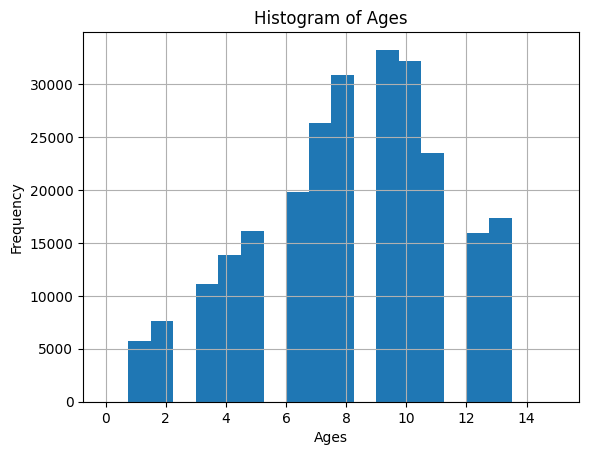

In [48]:
df['Age'].hist(bins=20, range=(0, 15))
plt.title('Histogram of Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()